In [997]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [998]:
### Loading the Dataset
data = pd.read_csv("House_Rent_Dataset.csv")

## Data Profiling

In [999]:
data.info() # read all the possible features in the CSV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [1000]:
data.isnull().sum() # check for nullity

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [1001]:
data.head # quick overview of the csv

<bound method NDFrame.head of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/F

## Data Cleaning

In [1002]:
data['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [1003]:
# Clean floor errors like "3 out of 2"(for consistency)
data['Floor'].value_counts()

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [1004]:
def validate_floor_format(data, column):
    def validate_floor(parts):
        try:
            if int(parts[0]) > int(parts[3]):  # checking for X out of Y
                return None  # Invalid format, marked for dropping (inconsistency)
            else:
                return ' '.join(parts)  # Valid format, return 
        except (ValueError, IndexError): # assuming that the floor structure is as follows: LB -> UB -> Ground -> First Floor -> and so on
            if parts[0] in ['Ground', 'Upper', 'Lower']:
                if parts[0] == 'Ground':
                    if len(parts) == 1:
                        parts[0] = '1 out of 1'
                        return ' '.join(parts)
                    else:
                        parts[0] = '1'
                        parts[-1] = str(int(parts[-1]) + 1)
                        return ' '.join(parts)
                if parts[0] == 'Upper':
                    parts[0] = '1'
                    parts.remove('Basement')
                    parts[-1] = str(int(parts[-1]) + 2)
                    return ' '.join(parts)
                if parts[0] == 'Lower':
                    parts[0] = '1'
                    parts.remove('Basement')
                    parts[-1] = str(int(parts[-1]) + 3)
                    return ' '.join(parts)
            return None  # Invalid format, marked for dropping (inconsistency)

    # Apply the validation function to each row
    data[column] = data[column].str.split().apply(validate_floor)
    # Drop rows with invalid format
    data = data.dropna(subset=[column])
    return data

data = validate_floor_format(data, 'Floor')


In [1005]:
cleaned_floor_data = data
cleaned_floor_data # all floor values are now cleaned and quantified

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,1 out of 3,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


## Data Analysis

<BarContainer object of 6 artists>

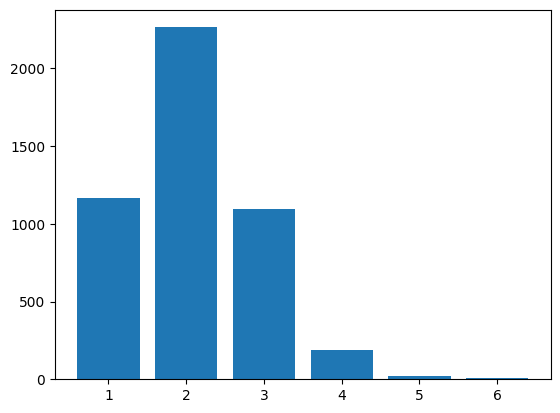

In [1006]:
plt.bar(cleaned_floor_data['BHK'].value_counts().index, data['BHK'].value_counts().values) # BHK can be used as a feature

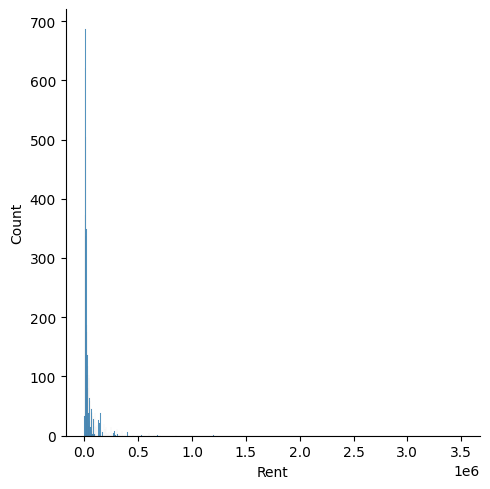

In [1007]:
sns.displot(cleaned_floor_data['Rent']) # too many outliers can affect the final output of the model. It will skew the value.

In [1008]:
cleaned_floor_data['Rent'].describe() # Lots of abnormal outliers

count    4.741000e+03
mean     3.501644e+04
std      7.814423e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

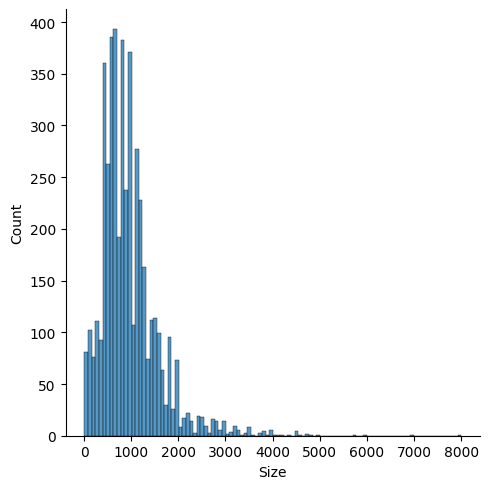

In [1009]:
sns.displot(cleaned_floor_data['Size']) # Reasonable sizes. No need to adjust

In [1010]:
cleaned_floor_data['Size'].describe() # Reasonable

count    4741.000000
mean      967.747522
std       634.400192
min        10.000000
25%       550.000000
50%       850.000000
75%      1200.000000
max      8000.000000
Name: Size, dtype: float64

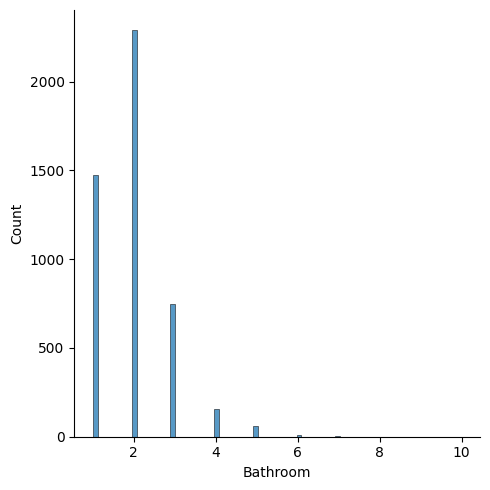

In [1011]:
sns.displot(cleaned_floor_data['Bathroom']) # Reasonable sizes. No need to adjust

In [1012]:
cleaned_floor_data['Floor'].value_counts()

Floor
1 out of 3      643
1 out of 2      574
1 out of 4      414
2 out of 3      312
2 out of 4      308
               ... 
48 out of 68      1
12 out of 42      1
35 out of 68      1
18 out of 30      1
23 out of 34      1
Name: count, Length: 448, dtype: int64

In [1013]:
cleaned_floor_data['Area Type'].value_counts()

Area Type
Super Area     2444
Carpet Area    2295
Built Area        2
Name: count, dtype: int64

In [1014]:
cleaned_floor_data['Area Locality'].value_counts()

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Jayanti Nagar, Hormavu                      1
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
Manikonda, Hyderabad                        1
Name: count, Length: 2233, dtype: int64

In [1015]:
cleaned_floor_data['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2249
Unfurnished       1813
Furnished          679
Name: count, dtype: int64

In [1016]:
cleaned_floor_data['Tenant Preferred'].value_counts()

Tenant Preferred
Bachelors/Family    3440
Bachelors            830
Family               471
Name: count, dtype: int64

In [1017]:
cleaned_floor_data['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3211
Contact Agent      1529
Contact Builder       1
Name: count, dtype: int64

## Data Preprocessing

In [1018]:
# Get rid of Rent Outliers by dropping the extreme lows and extreme highs
# Define the lower and upper percentile thresholds
lower_percentile = 0.10  # To represent the lower end of house prices
upper_percentile = 0.90  # To represent the higher end of house prices

# Calculate the quantiles
lower_threshold = cleaned_floor_data['Rent'].quantile(lower_percentile)
upper_threshold = cleaned_floor_data['Rent'].quantile(upper_percentile)

# Filter out the rows with rent values outside the thresholds
no_rent_outliers = cleaned_floor_data[(cleaned_floor_data['Rent'] >= lower_threshold) & (cleaned_floor_data['Rent'] <= upper_threshold)]
no_rent_outliers

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,1 out of 3,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [1019]:
no_rent_outliers['Rent'].describe() # more reasonable prices

count     3854.000000
mean     21385.381162
std      14665.396504
min       7000.000000
25%      11000.000000
50%      16000.000000
75%      27000.000000
max      72000.000000
Name: Rent, dtype: float64

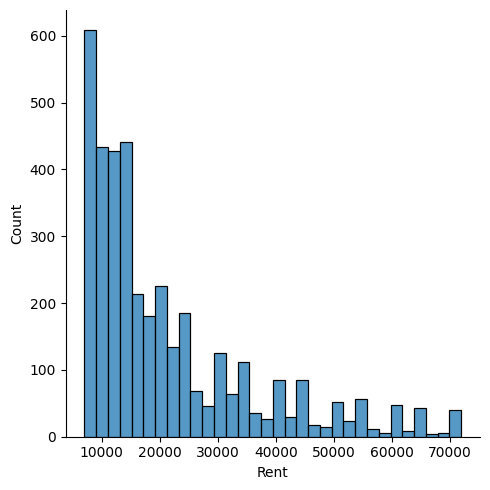

In [1020]:
sns.displot(no_rent_outliers['Rent']) # more reasonable scale

## Feature Engineering

In [1021]:
import pandas as pd

# Split 'Floor' column into 'Room Height' and 'Building Height'
no_rent_outliers[['Room Height', 'Building Height']] = no_rent_outliers['Floor'].str.split(' out of ', expand=True).astype(int)
# Define bin ranges and labels
bin_ranges = [0, 1, 4, 7, 10, 17, 40, float('inf')]
bin_labels = ['One-story', 'Low-rise', 'Multi-story', 'Middle-rise', 'Small high-rise', 'High-rise', 'Ultra high-rise']
# Create 'Building Classification' column with ranges
# 1 - One-story, 2:3 - Low-Rise, 4:7 - Multi-story, 8:10 - Middle-rise, 11:17 - Small high-rise, 18:40 - High-Rise, 41+ - Ultra
no_rent_outliers['Building Classification'] = pd.cut(no_rent_outliers['Building Height'], bins=bin_ranges, labels=bin_labels)
no_rent_outliers


C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_25092\1657722621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_rent_outliers[['Room Height', 'Building Height']] = no_rent_outliers['Floor'].str.split(' out of ', expand=True).astype(int)
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_25092\1657722621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_rent_outliers[['Room Height', 'Building Height']] = no_rent_outliers['Floor'].str.split(' out of ', expand=True).astype(int)
C:\Users\S

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Room Height,Building Height,Building Classification
0,2022-05-18,2,10000,1100,1 out of 3,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1,3,Low-rise
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,Low-rise
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,Low-rise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,Multi-story
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,Low-rise
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,Multi-story
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34,High-rise


In [1022]:
quantified_floor = no_rent_outliers.drop(columns='Floor', axis =1)
quantified_floor

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Room Height,Building Height,Building Classification
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1,3,Low-rise
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,Low-rise
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,Low-rise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,Multi-story
4742,2022-05-15,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,Low-rise
4743,2022-07-10,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,Multi-story
4744,2022-07-06,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34,High-rise


In [1023]:
## Quantifying Area Locality

# Group by 'Area Locality' and count the number of houses in each locality
locality_counts = quantified_floor.groupby('Area Locality').size().reset_index(name='Locality Competition')

# Merge with original dataframe using Area Locality as key
quantified_floor = pd.merge(quantified_floor, locality_counts, on='Area Locality', how='left')



In [1024]:
quantified_locality = quantified_floor # we do not drop area locality to give value to itself. Competition will state that this area has
# lots of density
quantified_locality

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Room Height,Building Height,Building Classification,Locality Competition
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1,3,Low-rise,1
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise,1
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise,16
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,Low-rise,2
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,Low-rise,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,2022-05-18,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,Multi-story,2
3850,2022-05-15,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,Low-rise,1
3851,2022-07-10,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,Multi-story,9
3852,2022-07-06,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34,High-rise,28


In [1025]:
## Quantifying City
city_counts = quantified_locality.groupby('City').size().reset_index(name='City Competition')
quantified_locality = pd.merge(quantified_locality, city_counts, on='City', how='left')

In [1026]:
quantified_city = quantified_locality # same gist as before
quantified_city

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Room Height,Building Height,Building Classification,Locality Competition,City Competition
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1,3,Low-rise,1,363
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise,1,363
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise,16,363
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,Low-rise,2,363
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,Low-rise,1,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,2022-05-18,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,Multi-story,2,780
3850,2022-05-15,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,Low-rise,1,780
3851,2022-07-10,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,Multi-story,9,780
3852,2022-07-06,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34,High-rise,28,780


In [1027]:
## Quantifying Area Type
type_counts = quantified_city.groupby('Area Type').size().reset_index(name='Area Type Competition')
quantified_city = pd.merge(quantified_city, type_counts, on='Area Type', how='left')

In [1028]:
quantified_type = quantified_city # same
quantified_type

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Room Height,Building Height,Building Classification,Locality Competition,City Competition,Area Type Competition
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1,3,Low-rise,1,363,2089
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise,1,363,2089
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise,16,363,2089
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,Low-rise,2,363,2089
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,Low-rise,1,363,1764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,2022-05-18,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,Multi-story,2,780,1764
3850,2022-05-15,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,Low-rise,1,780,2089
3851,2022-07-10,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,Multi-story,9,780,1764
3852,2022-07-06,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34,High-rise,28,780,1764


In [1029]:
final_data = quantified_type.drop(columns=['Posted On']) # drop this since it does not give information 
final_data # this will now be the final dataset for the model

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Room Height,Building Height,Building Classification,Locality Competition,City Competition,Area Type Competition
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1,3,Low-rise,1,363,2089
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise,1,363,2089
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,Low-rise,16,363,2089
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,Low-rise,2,363,2089
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,Low-rise,1,363,1764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,Multi-story,2,780,1764
3850,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,Low-rise,1,780,2089
3851,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,Multi-story,9,780,1764
3852,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34,High-rise,28,780,1764


In [1030]:
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first=True, prefix=column+suffix)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [1031]:
# Tried this but does not help the model
from sklearn.preprocessing import LabelEncoder
def one_label_encode(data, column):
    encoder = LabelEncoder()
    data['Label-Encode ' + column] = encoder.fit_transform(data[column])
    data = data.drop(column, axis = 1)
    return data

In [1032]:
final_data = one_hot_encode(final_data, 'Area Type')
final_data = one_hot_encode(final_data, 'Area Locality')
final_data = one_hot_encode(final_data, 'City')
final_data = one_hot_encode(final_data, 'Furnishing Status')
final_data = one_hot_encode(final_data, 'Tenant Preferred')
final_data = one_hot_encode(final_data, 'Point of Contact')
final_data = one_hot_encode(final_data, 'Building Classification')
final_data


,BHK,Rent,Size,Bathroom,Room Height,Building Height,Locality Competition,City Competition,Area Type Competition,Area Type_Carpet Area,...,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Owner,Building Classification_Low-rise,Building Classification_Multi-story,Building Classification_Middle-rise,Building Classification_Small high-rise,Building Classification_High-rise,Building Classification_Ultra high-rise
0,2,10000,1100,2,1,3,1,363,2089,False,...,True,True,False,True,True,False,False,False,False,False
1,2,20000,800,1,1,3,1,363,2089,False,...,False,True,False,True,True,False,False,False,False,False
2,2,17000,1000,1,1,3,16,363,2089,False,...,False,True,False,True,True,False,False,False,False,False
3,2,10000,800,1,1,2,2,363,2089,False,...,True,True,False,True,True,False,False,False,False,False
4,2,7500,850,1,1,2,1,363,1764,True,...,True,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,2,15000,1000,2,3,5,2,780,1764,True,...,False,True,False,True,False,True,False,False,False,False
3850,3,29000,2000,3,1,4,1,780,2089,False,...,False,True,False,True,True,False,False,False,False,False
3851,3,35000,1750,3,3,5,9,780,1764,True,...,False,True,False,False,False,True,False,False,False,False
3852,3,45000,1500,2,23,34,28,780,1764,True,...,False,False,True,False,False,False,False,False,True,False


## Model Training
## Training and Test Split

In [1033]:
X = final_data.drop('Rent', axis= 1)
y = final_data['Rent']

In [1034]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

## Standardize the Values

In [1035]:
from sklearn.preprocessing import StandardScaler    
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Regularization: Get the Optimal Alpha Value

In [1036]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def find_best_alpha(X_train, y_train, alphas):
    """
    Find the best value of alpha for Lasso Regression using cross-validation.
    
    Parameters:
    - X_train: Training features
    - y_train: Training target variable
    - alphas: List of alpha values to test
    
    Returns:
    - best_alpha: Optimal value of alpha
    """
    # Create a pipeline with StandardScaler and Lasso Regression
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso())
    ])
    
    # Define parameter grid with alpha values
    param_grid = {
        'lasso__alpha': alphas
    }
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    
    # Fit GridSearchCV to training data
    grid_search.fit(X_train, y_train)
    
    # Get the best alpha value
    best_alpha = grid_search.best_params_['lasso__alpha']
    
    return best_alpha

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]  # List of alpha values to test
best_alpha = find_best_alpha(X_train, y_train, alphas)
print("Best Alpha:", best_alpha)


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.832e+10, tolerance: 5.379e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e+10, tolerance: 5.267e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

Best Alpha: 100


In [1037]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)
print("Training set score:", lasso_train_score)
print("Test set score:", lasso_test_score)

Training set score: 0.8768182504953619
Test set score: 0.7210931463225305


## Evaluation

### Quantitative Evaluation

In [1038]:
y_preds = lasso.predict(X_test)

In [1039]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", lasso.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [2367.69272496 3617.40579591 1708.0688289  ...  424.98542519   -0.
   83.09883155]
Mean squared error: 56630498.51
Coefficient of determination: 0.72


### Qualitative Evaluation

In [1040]:
sample_data = X.iloc[0]
sample_data

BHK                                            2
Size                                        1100
Bathroom                                       2
Room Height                                    1
Building Height                                3
                                           ...  
Building Classification_Multi-story        False
Building Classification_Middle-rise        False
Building Classification_Small high-rise    False
Building Classification_High-rise          False
Building Classification_Ultra high-rise    False
Name: 0, Length: 1903, dtype: object

In [1041]:
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1042]:
model_rent_forecast = lasso.predict(sample_data_standardized)[0]
model_rent_forecast

14189.971993023652

In [1043]:
y.iloc[0]

10000

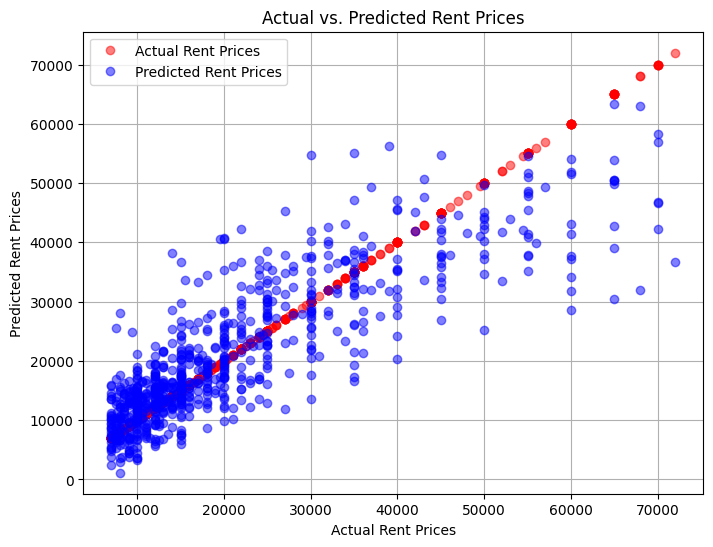

In [1044]:
plt.figure(figsize=(8,6))
plt.plot(y_test, y_test, 'o', alpha=0.5, color='red', label='Actual Rent Prices')
plt.plot(y_test, y_preds, 'o', alpha=0.5, color='blue', label='Predicted Rent Prices')

plt.title("Actual vs. Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")

plt.legend()
plt.grid(True)
plt.show()